In [94]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
from sklearn.cluster import KMeans

import pandas as pd
import nltk
import nltk.data


In [117]:
df = 'townhall.txt'


tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
fp = open("townhall.txt")
data = fp.read()

df ='\n\n'.join(tokenizer.tokenize(data))

df = df.split("\n\n")   


topics_no = 4
range_t = topics_no + 1

vectorizer = CountVectorizer(stop_words="english", ngram_range=(2,2))
vectorized = vectorizer.fit_transform(df)


lda = LatentDirichletAllocation(n_topics=topics_no, learning_method='batch')
lda.fit(vectorized)

def print_top_words(model, feature_names, n_top_words):
    print('\n--------------------------------\n')
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % (topic_idx+1))
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
print_top_words(lda, vectorizer.get_feature_names(),n_top_words = 10)


/anaconda2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)



--------------------------------

Topic #1:
background check, senator rubio, make sure, going tell, lapido ph, mike loesch, sheriff israel, don think, background checks, year old
Topic #2:
unidentified female, applause rubio, applause tapper, people want, second amendment, believe saying, want bring, baker act, don know, gun control
Topic #3:
tapper thank, stoneman douglas, senator rubio, senator nelson, high school, applause tapper, want bring, douglas high, thank senator, town hall
Topic #4:
law enforcement, bump stocks, answer question, assault weapons, don want, applause tapper, nra money, senator nelson, semi automatic, stoneman douglas


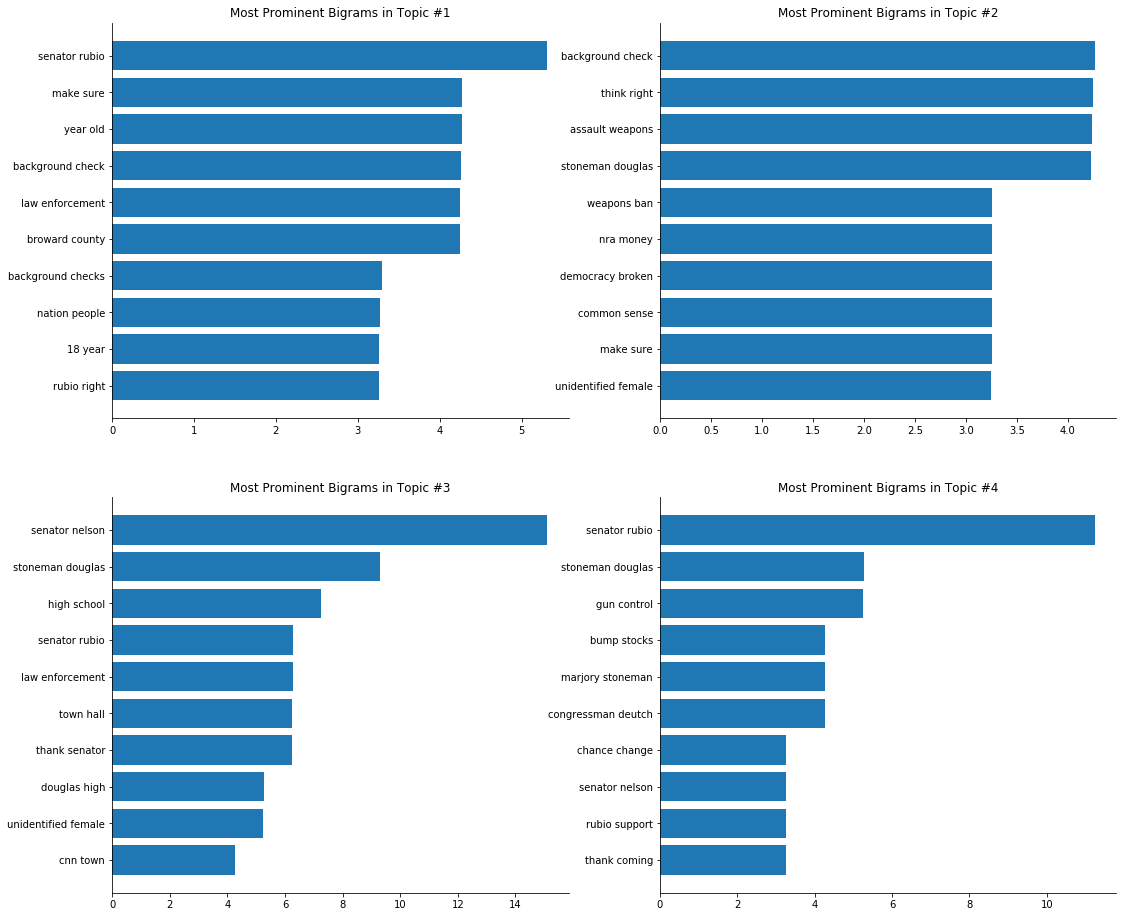

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

topics_no = 4
range_t = topics_no + 1

def plot_lda(coef, feature_names, top_n=10, ax=None, title=None):
    
    #Initialize an axis if None is given
    if ax is None:
        return None
        ax = plt.gca()
    
    #Sort coefficients and take the top_n
    inds = np.argsort(coef)
    high = inds[-top_n:]
    
    #Set a range for the plot
    myrange = range(len(high))
    
    #Plot the bar chart 
    ax.barh(myrange, coef[high])
    ax.set_yticks(myrange)
    
    ax.set_yticklabels([feature_names[h] for h in high])
    ax.yaxis.labelpad=10
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #If a title is given, give the plot a title
    if title:
        ax.set_title(title)

components = lda.components_
feature_names = vectorizer.get_feature_names()

fig, axes = plt.subplots(2,2, figsize=(18, 16))
for component,ax,i in zip(components, axes.flatten(), range(1,range_t)):
    plot_lda(component, feature_names, ax=ax, title = 'Most Prominent Bigrams in Topic #%d' %i)

/anaconda2/lib/python2.7/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


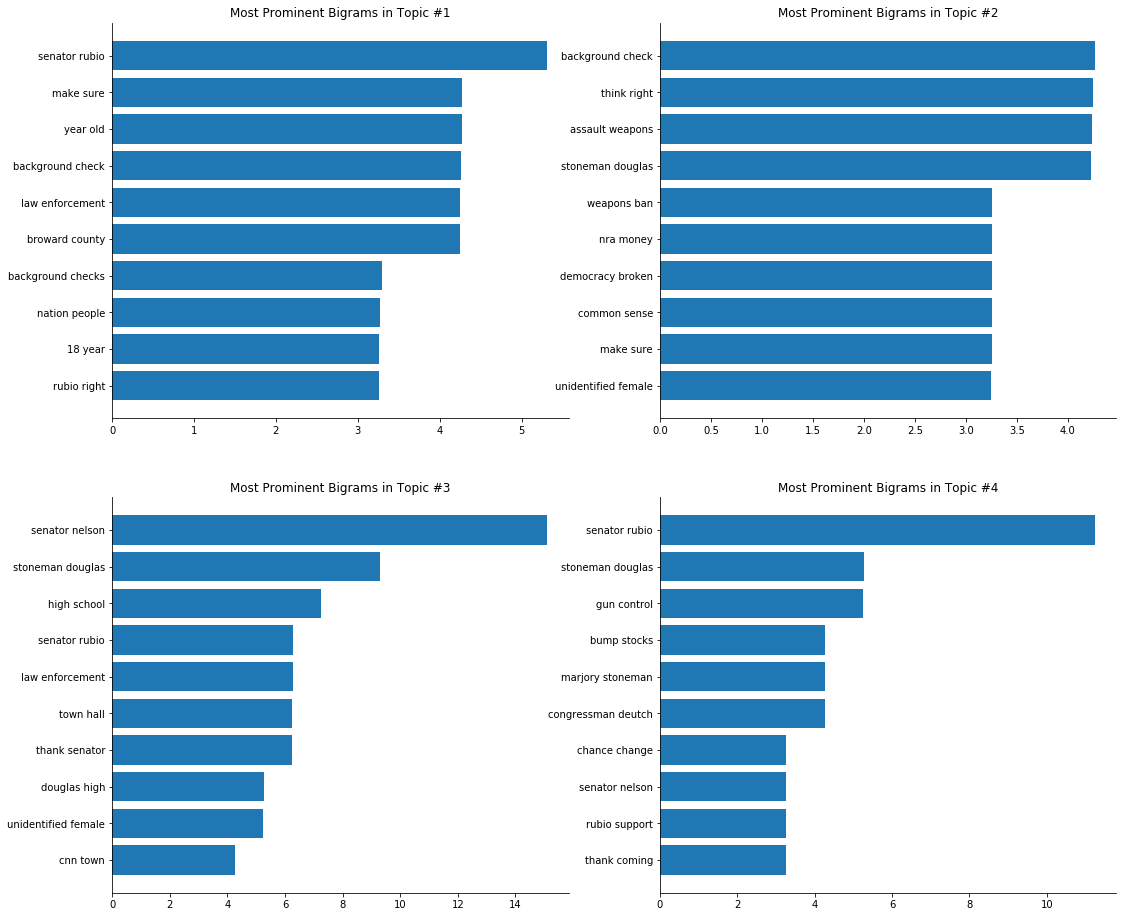

In [122]:
from sklearn.feature_extraction import stop_words

stop = list(stop_words.ENGLISH_STOP_WORDS)

banned = ["applause", "tapper", "tell", "let", "want", "know", 
 "let", "got", "don", "sir", "yes", "little", "question", "ask", "answer", "said", "goin", "don", "lapido", "ll", "want", "bring", "" "us", "go", "also", "lot", "'s", "'re", "n't", "'m", "going", "--_--", "—", "--", "'ve", "ve"]


banned_total = set(stop + banned)

vectorizer = CountVectorizer(stop_words=banned_total, ngram_range=(2,2))

vectorized = vectorizer.fit_transform(df)

topics_no = 4
range_t = topics_no + 1

lda = LatentDirichletAllocation(n_topics=topics_no, learning_method='batch')
lda.fit(vectorized)

components = lda.components_
feature_names = vectorizer.get_feature_names()




fig, axes = plt.subplots(2,2, figsize=(18, 16))
for component,ax,i in zip(components, axes.flatten(), range(1,range_t)):
    plot_lda(component, feature_names, ax=ax, title = 'Most Prominent Bigrams in Topic #%d' %i)

        

In [111]:
import PyPDF2
import csv

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from gensim import corpora
from gensim.models import LdaModel

import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA
from sklearn.cluster import KMeans

import pyLDAvis.gensim

def bigram_preprocess(tokens, deacc=True, lowercase=True, errors='ignore',
    stemmer=None, stopwords=None):
    """
    Convert a document into a list of tokens.
    Split text into sentences and sentences into bigrams.
    the bigrams returned are the tokens
    """
    bigrams = []

    if len(tokens) >1:
        for i in range(0,len(tokens)-1):
            yield tokens[i] + '_' + tokens[i+1]

#nltk.download()

In [125]:
df 

documents = df

from sklearn.feature_extraction import stop_words

stop = list(stop_words.ENGLISH_STOP_WORDS)

banned = ["applause", "tapper", "tell", "let", "want", "know", 
 "let", "got", "don", "sir", "yes", "little", "question", "ask", "answer", "said", "goin", "don", "lapido", "ll", "want", "bring", "" "us", "go", "also", "lot", "'s", "'re", "n't", "'m", "going", "--_--", "—", "--", "'ve", "ve"]



banned_total = set(stop + banned)

texts = [word_tokenize(doc)  for doc in documents]
texts_lower = [[word.lower() for word in text] for text in texts]
unigrams = [[word for word in text if not word.isdigit() and word not in banned_total and len(word) > 1] for text in texts_lower]

bigrams = [[bigram for bigram in bigram_preprocess(text)] for text in unigrams]

dictionary_bigrams = corpora.Dictionary(bigrams, prune_at=20000000)
dictionary_bigrams.save_as_text('gensim_dict_bigrams.txt')



In [126]:
corpus = [dictionary_bigrams.doc2bow(text) for text in bigrams]
lda = LdaModel(corpus, num_topics=5, id2word=dictionary_bigrams)

pyLDAvis.enable_notebook()
pyLDAvis.gensim.prepare(lda, corpus, dictionary_bigrams)

/anaconda2/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
3      21.469061        1       1  0.122840  0.023326
2      20.455691        1       2 -0.049175 -0.017860
1      20.156422        1       3 -0.040477  0.083077
0      19.620641        1       4 -0.001248 -0.104552
4      18.298186        1       5 -0.031941  0.016009, topic_info=     Category       Freq                     Term      Total  loglift  logprob
term                                                                          
877   Default  13.000000            senator_rubio  13.000000  30.0000  30.0000
3176  Default   3.000000            thank_senator   3.000000  29.0000  29.0000
3043  Default   4.000000                red_flags   4.000000  28.0000  28.0000
2089  Default   4.000000              bump_stocks   4.000000  27.0000  27.0000
184   Default   2.000000              dana_loesch   2.000000  26.0000  26.0000
2565  Default   5.000000          assault_weapons   5.000000  25.0000  25.0000
2428  Default   2.000000         democracy_broken   2.000000  24.0000  24.0000
2309  Default   3.000000                town_hall   3.000000  23.0000  23.0000
2476  Default  10.000000           senator_nelson  10.000000  22.0000  22.0000
66    Default   3.000000        background_checks   3.000000  21.0000  21.0000
3179  Default   2.000000                   5k_run   2.000000  20.0000  20.0000
832   Default   2.000000              rubio_right   2.000000  19.0000  19.0000
233   Default   2.000000                ..._rubio   2.000000  18.0000  18.0000
2278  Default   2.000000            rubio_support   2.000000  17.0000  17.0000
2185  Default   2.000000                 just_say   2.000000  16.0000  16.0000
1261  Default   2.000000           sheriff_israel   2.000000  15.0000  15.0000
3091  Default   2.000000          president_trump   2.000000  14.0000  14.0000
1124  Default   2.000000        students_families   2.000000  13.0000  13.0000
173   Default   2.000000               sandy_hook   2.000000  12.0000  12.0000
3203  Default   2.000000         sending_messages   2.000000  11.0000  11.0000
2362  Default   2.000000          off-mike_loesch   2.000000  10.0000  10.0000
1726  Default   2.000000            rubio_believe   2.000000   9.0000   9.0000
3583  Default   2.000000              weapons_war   2.000000   8.0000   8.0000
3066  Default   2.000000           believe_saying   2.000000   7.0000   7.0000
1363  Default   3.000000           broward_county   3.000000   6.0000   6.0000
2159  Default   4.000000              weapons_ban   4.000000   5.0000   5.0000
3569  Default   2.000000            hall_students   2.000000   4.0000   4.0000
3035  Default   2.000000                 cnn_town   2.000000   3.0000   3.0000
2401  Default   1.000000              right_right   1.000000   2.0000   2.0000
964   Default   1.000000          broward_sheriff   1.000000   1.0000   1.0000
...       ...        ...                      ...        ...      ...      ...
2000   Topic5   0.631073            expired_clear   1.064616   1.1754  -7.1992
2928   Topic5   0.631052       messages_crosstalk   1.064617   1.1754  -7.1993
1686   Topic5   0.631049  organization_experience   1.064616   1.1754  -7.1993
954    Topic5   0.631017           loesch_florida   1.064618   1.1753  -7.1993
1137   Topic5   0.631016    conduct_investigation   1.064619   1.1753  -7.1993
2547   Topic5   0.934790         florida_governor   1.593484   1.1650  -6.8063
707    Topic5   0.933826              office_gave   1.593489   1.1640  -6.8074
3019   Topic5   0.930832           gave_financial   1.593530   1.1607  -6.8106
1316   Topic5   0.929616     financial_incentives   1.593535   1.1594  -6.8119
2565   Topic5   2.920053          assault_weapons   5.321494   1.0982  -5.6673
2645   Topic5   1.156948              kill_people   2.123290   1.0912  -6.5931
1193   Topic5   1.155657              support_law   2.128380   1.0877  -6.5942
2278   Topic5   1.398362